In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
pack_cuda._ensure_initialized()


local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_list_total
   

In [2]:
%load_ext pyinstrument

In [3]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
import pack_ga3 as pack_ga2
import pack_runner
importlib.reload(pack_ga2)
fastMode = False
kgs.debugging_mode = 2 if fastMode else 1

tmp = pack_ga2.GA()

# runner = pack_ga2.Orchestrator(n_generations=3 if not fastMode else 50)
# runner.ga = pack_ga2.GAMultiRing(N=16 if not fastMode else 4)
# runner.ga.diversity_reset_threshold = 5./40
# runner.ga.mate_distance=6

# ga_base = pack_ga2.GASinglePopulationOld(N_trees_to_do=40)
# #ga_base.population_size = 250
# #ga_base.prob_mate_own = 0.25
# value = 0.125
# ga_base.population_size = int(ga_base.population_size * value)
# ga_base.selection_size = [int( (s-1) * value)+1 for s in ga_base.selection_size]
# seen = set()
# unique_selection = []
# for s in ga_base.selection_size:
#     while s in seen:
#         s += 1
#     seen.add(s)
#     unique_selection.append(s)
# ga_base.selection_size = unique_selection
# ga_base.selection_size = ga_base.selection_size[:-6]
# print(ga_base.selection_size)
# ga_base.do_legalize = False
# ga_base.reset_check_generations = 50 if not fastMode else 3
# ga_base.reset_check_threshold = 0.5 if not fastMode else 0.9
# ga_base.freeze_duration = 100 if not fastMode else 3
# #ga_base.move.moves[-1][2] *= 2
# ga_base.prob_mate_own = 0.7
# ga_base.reduce_h_threshold = 1e-5/40
# ga_base.always_allow_mate_with_better = False
# ga_base.fixed_h = -1.

# runner.ga.ga_base = ga_base
# runner.ga.do_legalize = False
# runner.ga.allow_reset_ratio = 0.5 if not fastMode else 0.
# runner.ga.make_own_fig = (2,3)
# runner.ga.make_own_fig_size = (18,12)
# runner.ga.best_costs_per_generation_ax = ((0,False,(0,0)) ,(1,True,(1,0)))
# runner.ga.plot_subpopulation_costs_per_generation_ax = ( (0,False,(0,1)) ,(1,True,(1,1)))
# runner.ga.champion_phenotype_ax = (0,2)
# runner.ga.plot_diversity_ax = (1,2)
# runner.diagnostic_plot = False
# runner.seed = 0

runner_one_nTree = pack_ga2.baseline()
runner_one_nTree.ga.do_legalize = False
runner = copy.deepcopy(runner_one_nTree)

ga_list = []
N_trees_list = [x.item() for x in list(np.arange(26,30))]
for N_tree in N_trees_list:
    ga_list.append( copy.deepcopy(runner_one_nTree.ga) )
    ga_list[-1].ga_base.N_trees_to_do = N_tree
    ga_list[-1].do_legalize= False
runner.ga = pack_ga2.GAMulti(single_champion=False)
runner.ga.ga_list = ga_list
runner.ga.make_own_fig = (1,1)
runner.ga.make_own_fig_size = (8,8)
runner.ga.best_costs_per_generation_ax = ((0,False,(0,0)),)
runner.diagnostic_plot = True
runner.plot_every = 3
runner.n_generations = 60000 if not fastMode else 3
runner.filename = f'ga_multi_tree_{np.min(N_trees_list)}_to_{np.max(N_trees_list)}'

runner.seed=84


KeyboardInterrupt: 

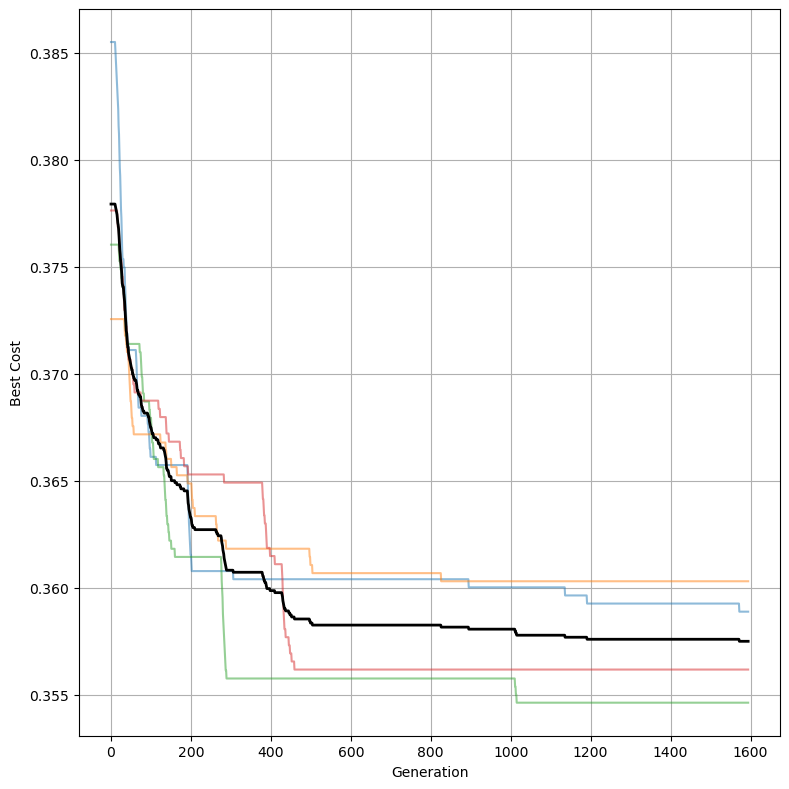

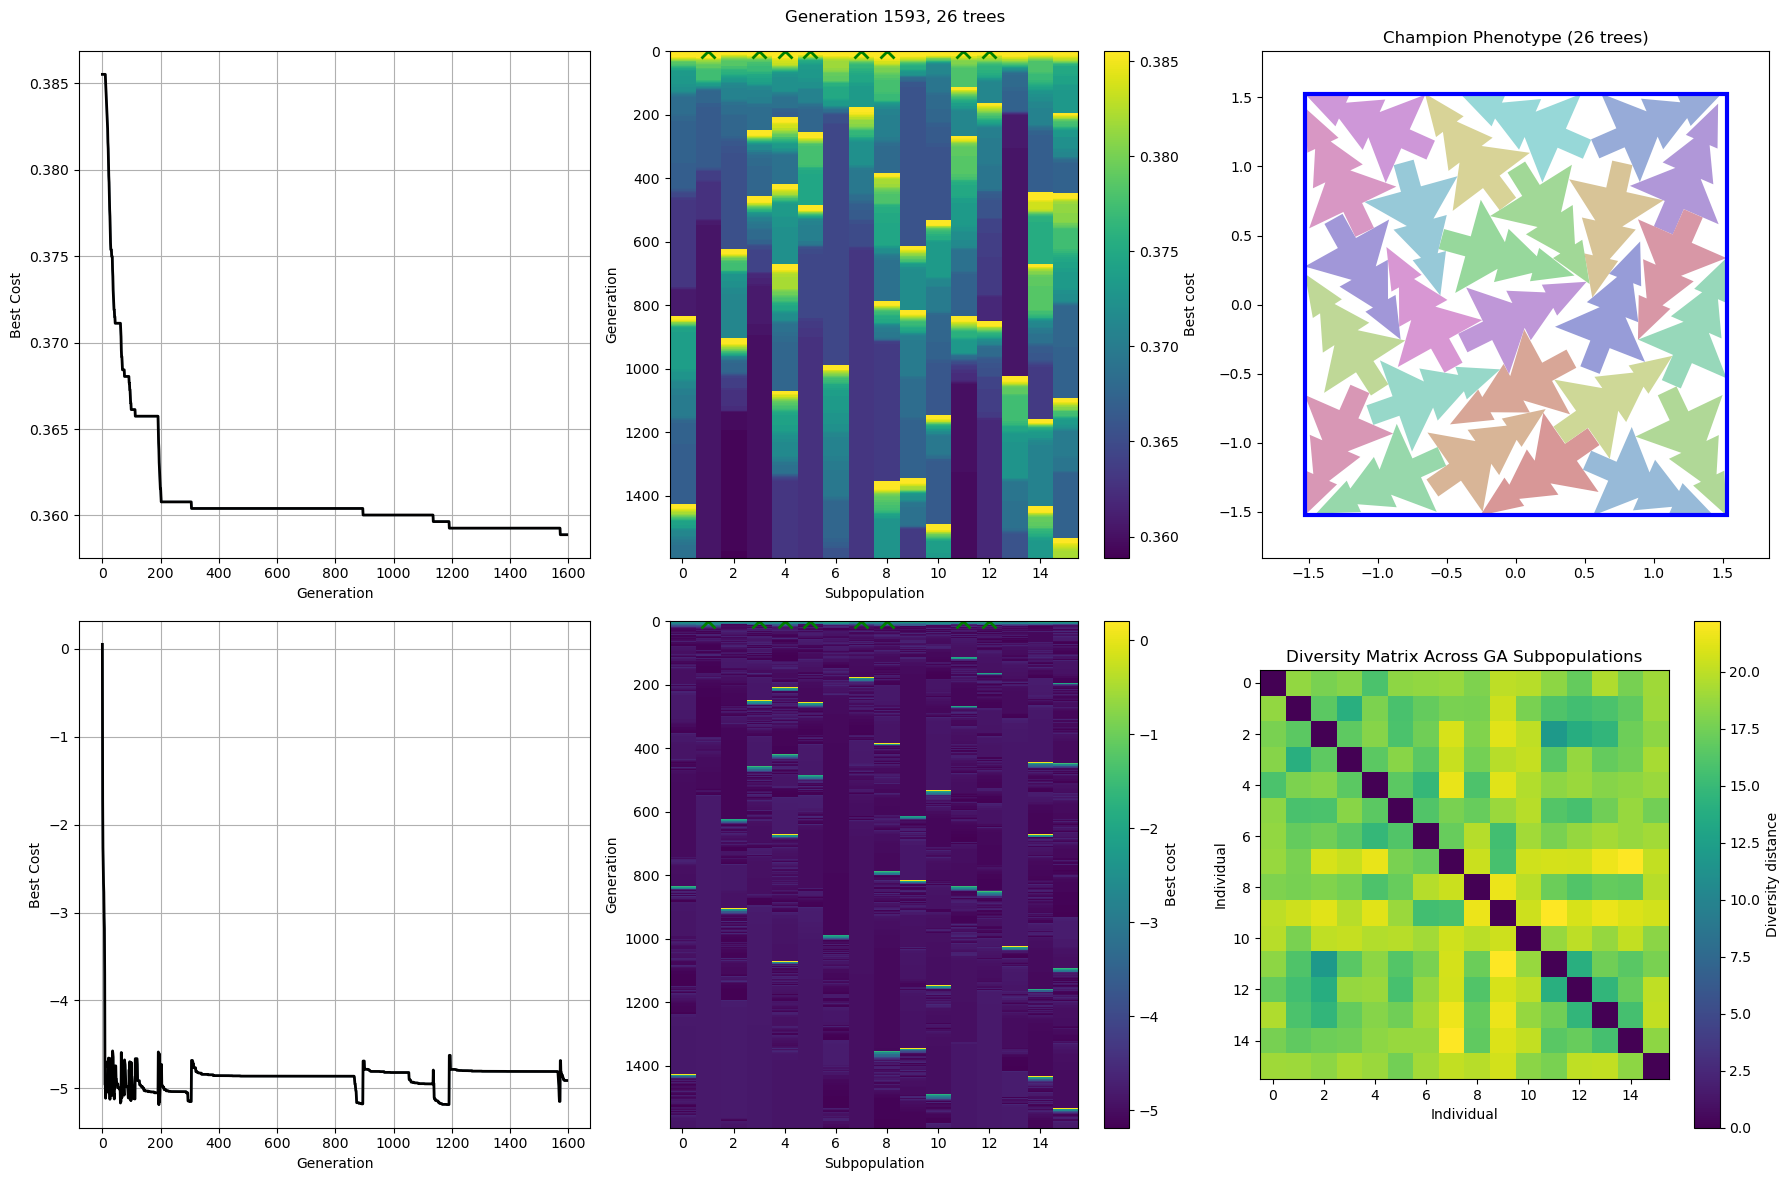

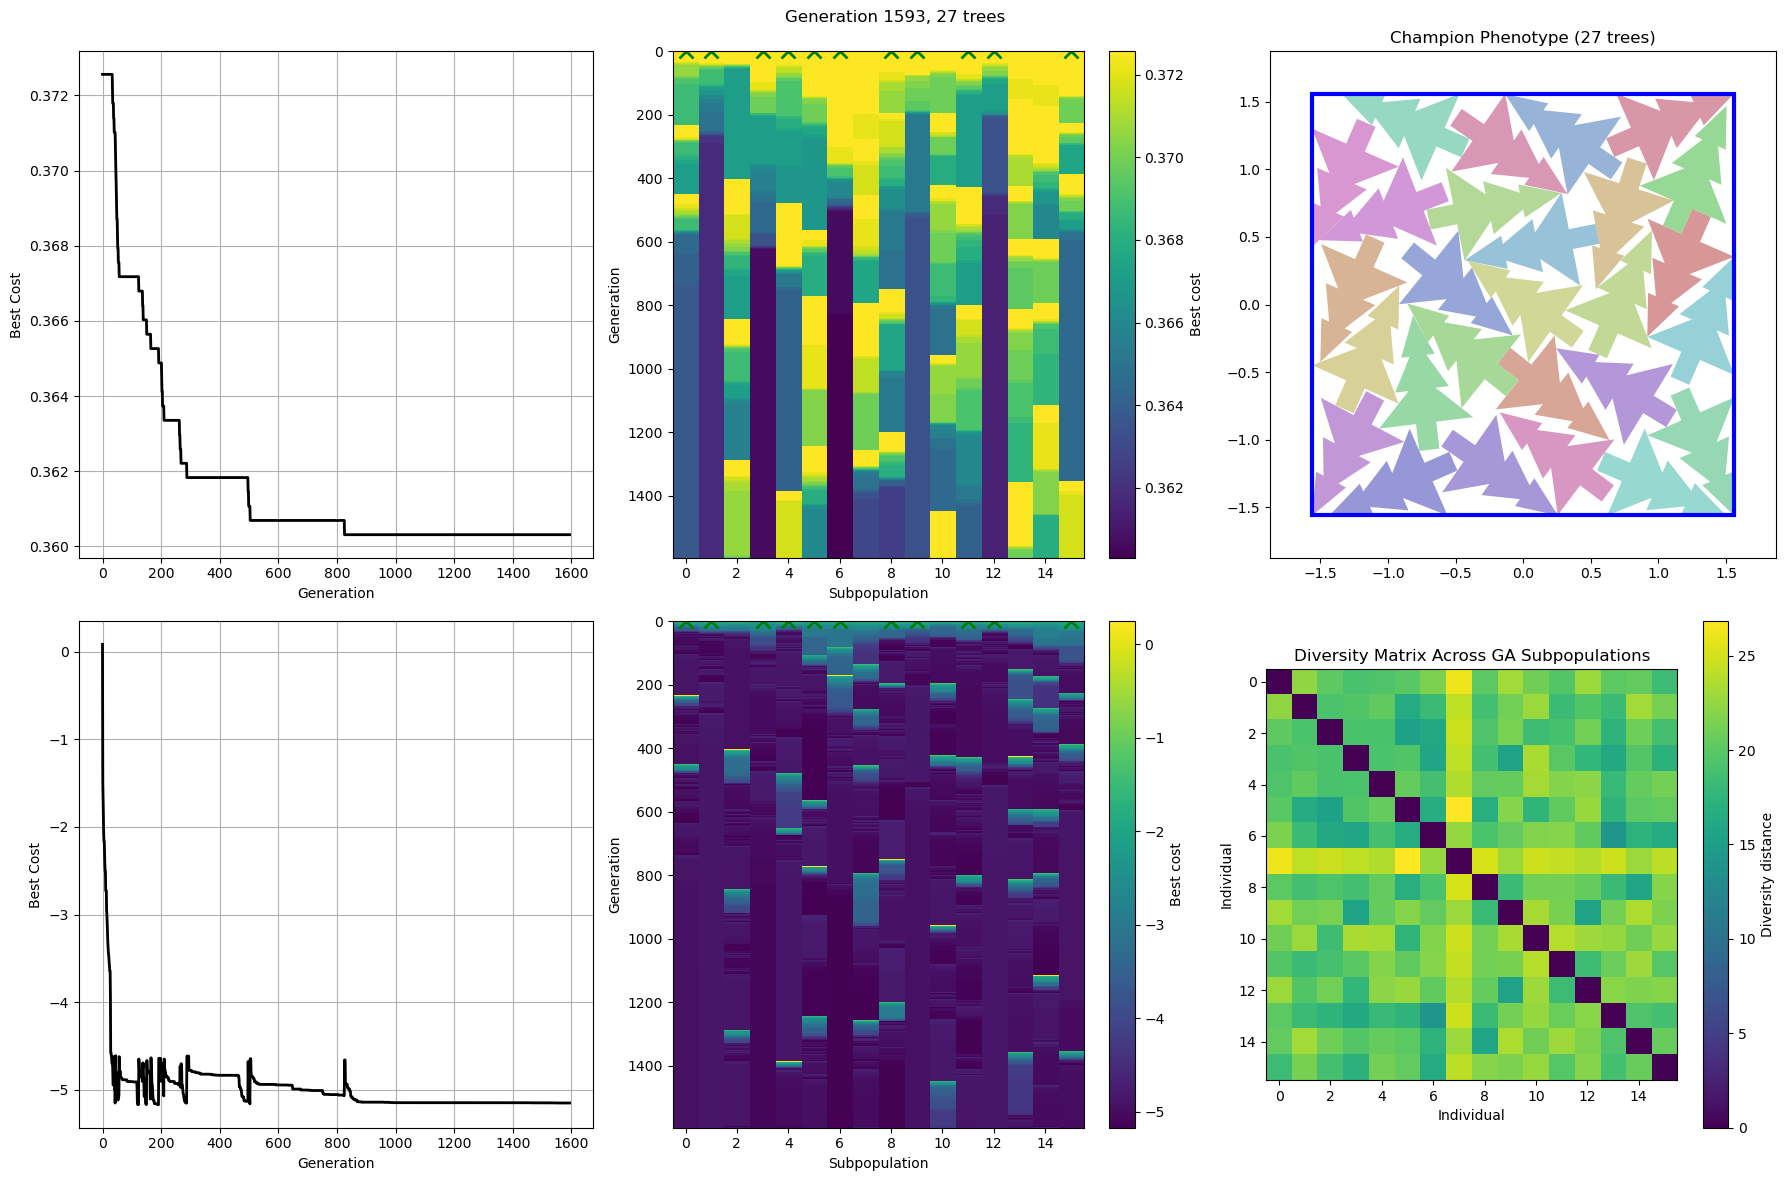

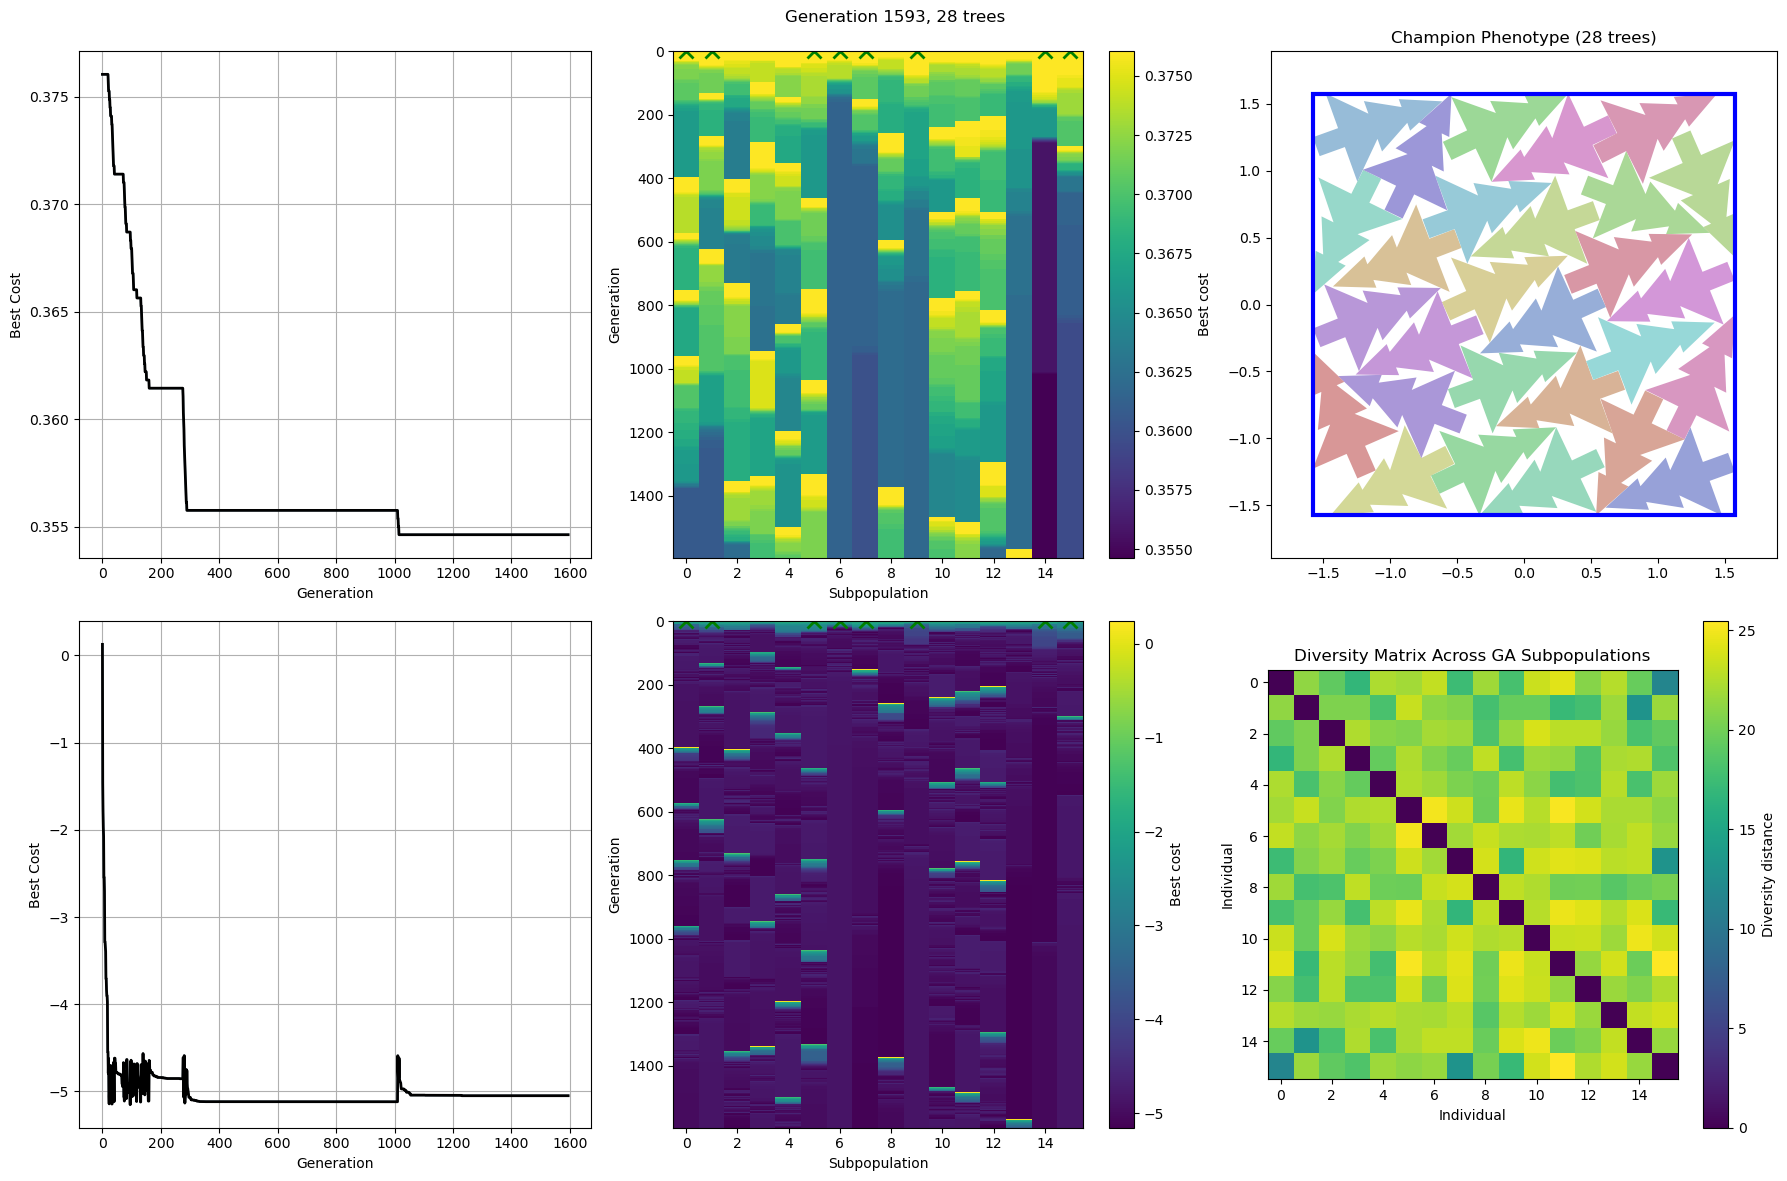

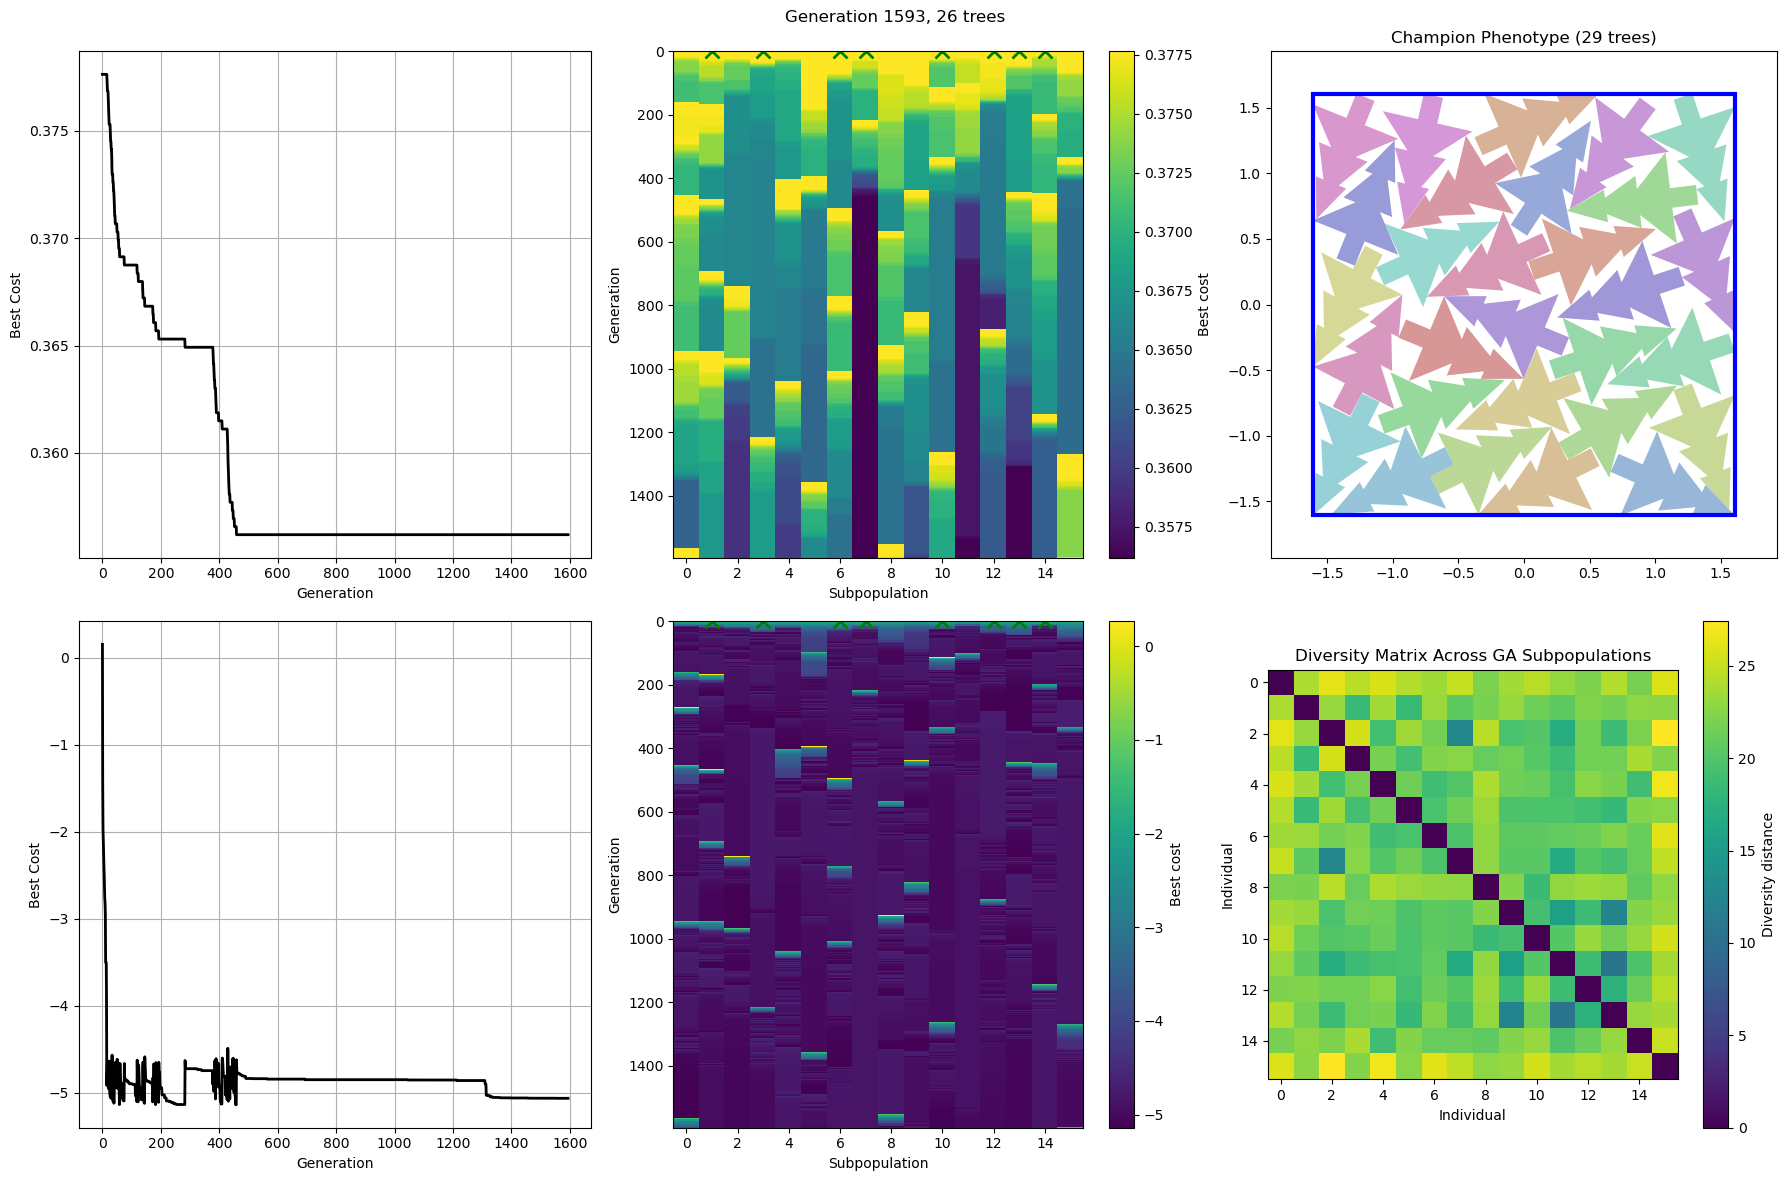

In [4]:
if os.path.isfile(kgs.temp_dir + runner.filename + '.pickle'):
    print("Loading existing runner...")
    runner = kgs.dill_load(kgs.temp_dir + runner.filename + '.pickle')
kgs.debugging_mode = -1000
print('fix above')
runner.run()

In [5]:
rr = kgs.dill_load(kgs.temp_dir + runner.filename + '.pickle')

N=26 best score: [3.5888928e-01 1.2298073e-05]
1
N=27 best score: [3.6031035e-01 7.0788756e-06]
1
N=28 best score: [3.5463604e-01 8.9308678e-06]
1
N=29 best score: [3.5618442e-01 8.6046275e-06]
1
1
1


<Figure size 640x480 with 0 Axes>

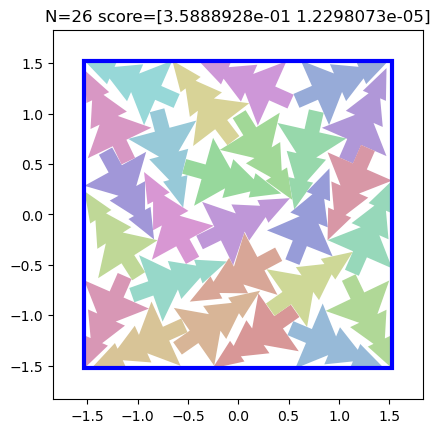

<Figure size 640x480 with 0 Axes>

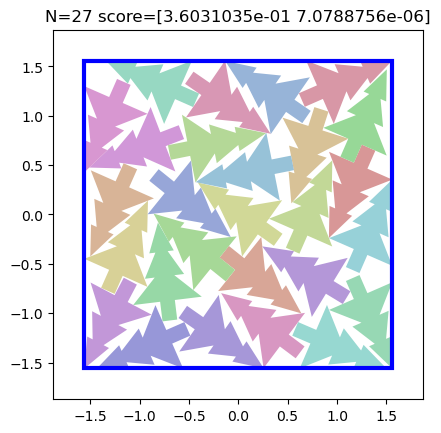

<Figure size 640x480 with 0 Axes>

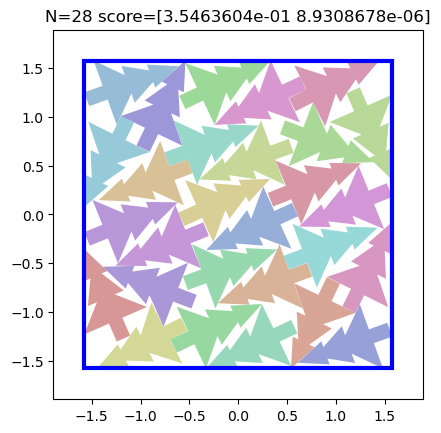

<Figure size 640x480 with 0 Axes>

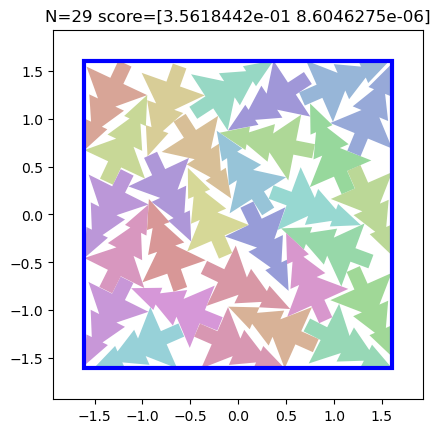

<Figure size 640x480 with 0 Axes>

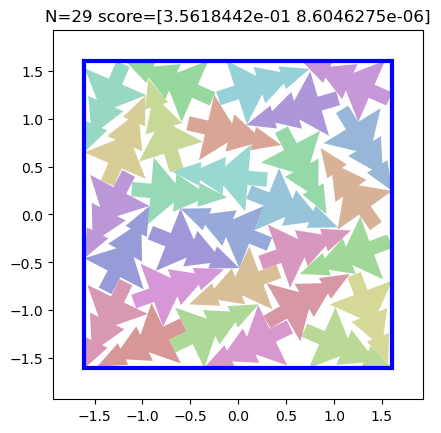

<Figure size 640x480 with 0 Axes>

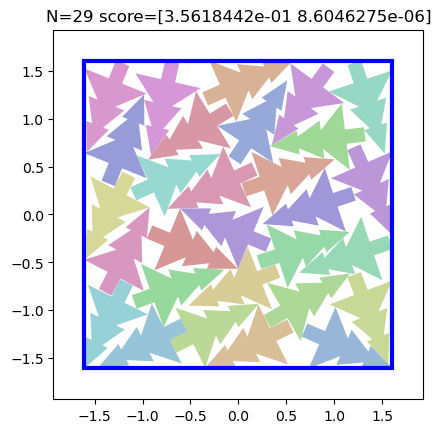

In [6]:
import pack_vis_sol
#rr.ga.diversity_reset_check_frequency = 1
#for ga in rr.ga.ga_list:
#    ga.diversity_reset_check_frequency = 1
#rr.ga.score(register_best=True) # remove duplicates
for ga in rr.ga.ga_list:
    best_score = ga.champions[-1].fitness[0]
    print(f"N={ga.ga_base.N_trees_to_do} best score: {best_score}")
    ga._fig = None
    ga._ax = None
    #ga.diagnostic_plots(-1,None)
    res = []
    for ga2 in ga.ga_list:        
        if ga2.champions[-1].fitness[0][0] == best_score[0]:
            plt.figure()
            pack_vis_sol.pack_vis_sol(ga2.champions[-1].phenotype)
            plt.title(f"N={ga.ga_base.N_trees_to_do} score={best_score}")
            res.append(ga2.champions[-1].phenotype)
            print(ga2.champions[-1].phenotype.N_solutions)

In [7]:
# importlib.reload(kgs)
# rrr=copy.deepcopy(res[0])
# rrr.merge(res[1])
# div_matrix = kgs.compute_genetic_diversity_matrix(rrr.xyt, rrr.xyt)
# div_matrix

In [8]:
for ga in rr.ga.ga_list:
    ga.do_legalize = True
rr.ga.finalize()

Before optimization:  0.09332365542650223 1.2442163097148295e-05 3.0546885
After optimization:  0.09272162616252899 0.00027114656404592097 3.0405672
After optimization:  0.09304902702569962 6.969204696360976e-05 3.0492513
After optimization:  0.09324876964092255 2.1955809643259272e-05 3.0533068
After optimization:  0.09340710192918777 4.647174137062393e-06 3.0561817
After optimization:  0.09347725659608841 1.2248810890014283e-06 3.057385
After optimization:  0.09351526200771332 3.0889378876963747e-07 3.0580215
After optimization:  0.09353496134281158 7.753344277716678e-08 3.0583475
After optimization:  0.09354278445243835 3.2324166454600345e-08 3.058476
After optimization:  0.09354875236749649 1.0699386265855537e-08 3.058574
After optimization:  0.09355301409959793 2.6028119659571303e-09 3.0586438
After optimization:  0.09355494379997253 4.83092454928169e-10 3.0586753
After optimization:  0.09355545789003372 2.2976598401669435e-10 3.0586836
After optimization:  0.09355616569519043 3.22

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.09672650694847107 0.00023724883794784546 3.106272
After optimization:  0.09702100604772568 5.959815462119877e-05 3.1138628
After optimization:  0.09720975160598755 1.669619814492762e-05 3.1175802
After optimization:  0.09732311218976974 4.6987693167466205e-06 3.1195898
After optimization:  0.09739171713590622 1.1719715757863014e-06 3.120746
After optimization:  0.0974273681640625 3.1877237915978185e-07 3.1213307
After optimization:  0.09744691103696823 7.867338069900143e-08 3.1216476
After optimization:  0.09745611250400543 2.3369773671788607e-08 3.121796
After optimization:  0.09745928645133972 1.3459112935265694e-08 3.121847
After optimization:  0.09746375679969788 4.1915138027093235e-09 3.1219187
After optimization:  0.09746664762496948 6.374593075619828e-10 3.121965
After optimization:  0.09746711701154709 3.8509806454811724e-10 3.1219723
After optimization:  0.09746797382831573 5.284117587933679e-11 3.1219862
Score of generated dataframe: 0.3609902470852505


/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.09875432401895523 0.00024226552341133356 3.138663
After optimization:  0.09895090758800507 0.00010314116661902517 3.1440065
After optimization:  0.09922825545072556 2.0752126147272065e-05 3.1497223
After optimization:  0.0993771180510521 4.663460458687041e-06 3.1523397
After optimization:  0.0994492769241333 1.16924820758868e-06 3.1535394
After optimization:  0.09948477149009705 3.2370240887757973e-07 3.1541157
After optimization:  0.09950461983680725 8.143959462358907e-08 3.154434
After optimization:  0.0995149239897728 2.019562650446005e-08 3.1545982
After optimization:  0.0995173379778862 1.287063611243866e-08 3.1546369
After optimization:  0.0995226725935936 1.7778436500748285e-09 3.1547215
After optimization:  0.09952381998300552 7.515119082590616e-10 3.1547396
After optimization:  0.0995246022939682 3.386658731230341e-10 3.154752
After optimization:  0.09952514618635178 1.527356990882467e-10 3.1547606
After optimization:  0.09952553361654282 6.4409047539903

/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/runs/../../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.10274946689605713 0.0002340319042559713 3.2018032
After optimization:  0.10303478688001633 6.267325079534203e-05 3.208927
After optimization:  0.10322882235050201 1.8400816770736128e-05 3.212638
After optimization:  0.10335904359817505 4.987921784049831e-06 3.2148726
After optimization:  0.10343536734580994 1.2339980912656756e-06 3.2161179
After optimization:  0.10347170382738113 3.516063884489995e-07 3.2166963
After optimization:  0.10349265486001968 9.100237718939752e-08 3.217026
After optimization:  0.10350149869918823 3.721209296259076e-08 3.2171643
After optimization:  0.10350790619850159 1.542681893340614e-08 3.2172642
After optimization:  0.10351341217756271 4.017361554531362e-09 3.21735
After optimization:  0.10351631045341492 8.652965011179958e-10 3.217395
After optimization:  0.10351730138063431 3.5467423442625545e-10 3.2174106
After optimization:  0.1035182848572731 7.160455561816548e-11 3.2174258
Score of generated dataframe: 0.3569563261112107


In [9]:
# import pack_io
# sol_list = [ga.champions[-1].phenotype for ga in rr.ga.ga_list]
# df = pack_io.solution_list_to_dataframe(sol_list)

In [10]:
sol_list = [ga.champions[-1].phenotype for ga in rr.ga.ga_list]
kgs.dill_save(kgs.code_dir + f'../res/' + runner.filename + '.pickle', sol_list)

In [ ]:
print(kgs.code_dir + f'../res/' + runner.filename + '.pickle')

/mnt/d//packing/code/core/../res/runner_multi_tree_{np.min(N_trees_list)}_to_{np.max(N_trees_list)}.pickle
